In [1]:
import numpy as np
from sklearn import metrics
import seaborn as sns
import pandas as pd

In [2]:
def print_cm(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


def print_result(labels, predictions):
    acc = metrics.accuracy_score(labels, predictions)
    prec = metrics.precision_score(labels, predictions)
    rec = metrics.recall_score(labels, predictions)
    f1 = metrics.f1_score(labels, predictions)
    mcc = metrics.matthews_corrcoef(labels, predictions)
    ck = metrics.cohen_kappa_score(labels, predictions)
    print_cm(metrics.confusion_matrix(labels, predictions))
    print("Acc: %.2f, P: %.2f, R: %.2f, F1: %.2f, MCC: %.2f, CK: %.2f" % (acc, prec, rec, f1, mcc, ck))
    return acc, prec, rec, f1, mcc, ck

# Use Case 1: Well balanced dataset

In [3]:
summary = {}

In [4]:
balanced_labels = np.concatenate([np.zeros(50), np.ones(50)])

good_predictions = np.concatenate([np.zeros(40), np.ones(10), np.zeros(10), np.ones(40)])
bad_predictions = np.concatenate([np.zeros(10), np.ones(80), np.zeros(10)])
terrible_predictions = np.concatenate([np.ones(50), np.zeros(50)])

Acc: 0.80, P: 0.80, R: 0.80, F1: 0.80, MCC: 0.60, CK: 0.60


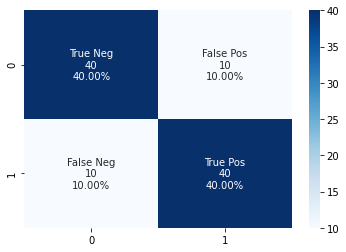

In [5]:
summary["balanced_good"] = print_result(balanced_labels, good_predictions)

Acc: 0.50, P: 0.50, R: 0.80, F1: 0.62, MCC: 0.00, CK: 0.00


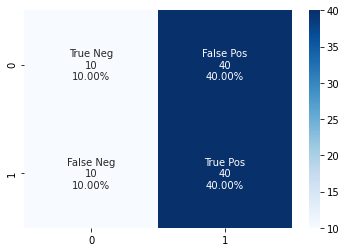

In [6]:
summary["balanced_bad"] = print_result(balanced_labels, bad_predictions)

Acc: 0.00, P: 0.00, R: 0.00, F1: 0.00, MCC: -1.00, CK: -1.00


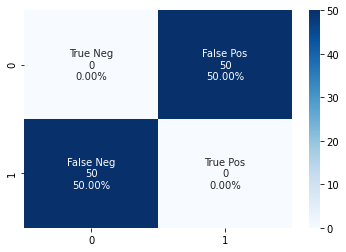

In [7]:
summary["balanced_terrible"] = print_result(balanced_labels, terrible_predictions)

# Use Case 2: Unbalanced dataset - Few ones

In [8]:
unbalanced_labels = np.concatenate([np.zeros(90), np.ones(10)])

good_predictions = np.concatenate([np.zeros(93), np.ones(7)])
bad_predictions_1 = np.concatenate([np.zeros(80), np.ones(20)])
bad_predictions_2 = np.concatenate([np.zeros(97), np.ones(3)])
terrible_predictions_1 = np.concatenate([np.zeros(99), np.ones(1)])
terrible_predictions_2 = np.concatenate([np.zeros(50), np.ones(50)])

Acc: 0.97, P: 1.00, R: 0.70, F1: 0.82, MCC: 0.82, CK: 0.81


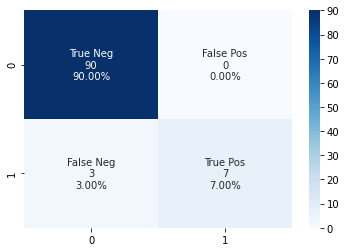

In [9]:
summary["unbalanced_good_fewones"] = print_result(unbalanced_labels, good_predictions)

Acc: 0.90, P: 0.50, R: 1.00, F1: 0.67, MCC: 0.67, CK: 0.62


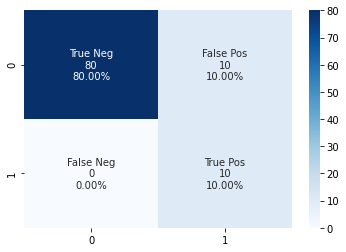

In [10]:
summary["unbalanced_bad_1_fewones"] = print_result(unbalanced_labels, bad_predictions_1)

Acc: 0.93, P: 1.00, R: 0.30, F1: 0.46, MCC: 0.53, CK: 0.44


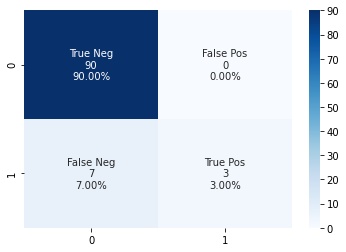

In [11]:
summary["unbalanced_bad_2_fewones"] = print_result(unbalanced_labels, bad_predictions_2)

Acc: 0.91, P: 1.00, R: 0.10, F1: 0.18, MCC: 0.30, CK: 0.17


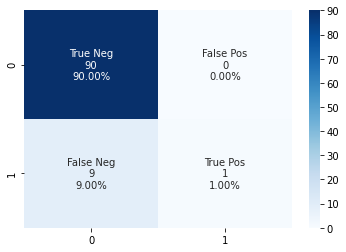

In [12]:
summary["unbalanced_terrible_1_fewones"] = print_result(unbalanced_labels, terrible_predictions_1)

Acc: 0.60, P: 0.20, R: 1.00, F1: 0.33, MCC: 0.33, CK: 0.20


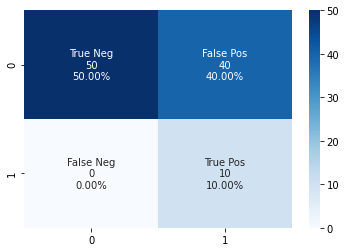

In [13]:
summary["unbalanced_terrible_2_fewones"] = print_result(unbalanced_labels, terrible_predictions_2)

# Use Case 3: Unbalanced dataset - Many ones

The distinctive features of F1 score have been discussed in the literature. Two main properties characterize F1 from MCC. First, F1 varies for class swapping, while MCC is invariant if the positive class is renamed negative and vice versa (from https://link.springer.com/article/10.1186/s12864-019-6413-7)

In [14]:
unbalanced_labels = np.concatenate([np.ones(90), np.zeros(10)])

good_predictions = np.concatenate([np.ones(93), np.zeros(7)])
bad_predictions_1 = np.concatenate([np.ones(80), np.zeros(20)])
bad_predictions_2 = np.concatenate([np.ones(97), np.zeros(3)])
terrible_predictions_1 = np.concatenate([np.ones(99), np.zeros(1)])
terrible_predictions_2 = np.concatenate([np.ones(50), np.zeros(50)])

Acc: 0.97, P: 0.97, R: 1.00, F1: 0.98, MCC: 0.82, CK: 0.81


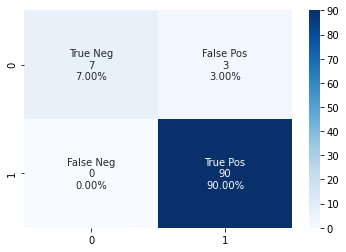

In [15]:
summary["unbalanced_good_manyones"] = print_result(unbalanced_labels, good_predictions)

Acc: 0.90, P: 1.00, R: 0.89, F1: 0.94, MCC: 0.67, CK: 0.62


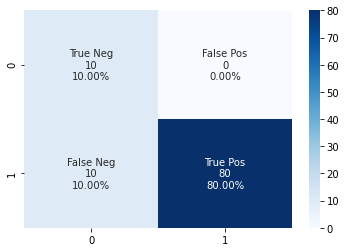

In [16]:
summary["unbalanced_bad_1_manyones"] = print_result(unbalanced_labels, bad_predictions_1)

Acc: 0.93, P: 0.93, R: 1.00, F1: 0.96, MCC: 0.53, CK: 0.44


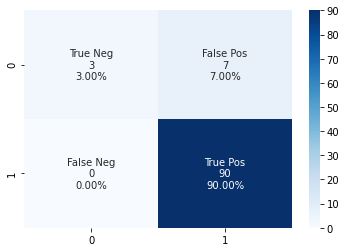

In [17]:
summary["unbalanced_bad_2_manyones"] = print_result(unbalanced_labels, bad_predictions_2)

Acc: 0.91, P: 0.91, R: 1.00, F1: 0.95, MCC: 0.30, CK: 0.17


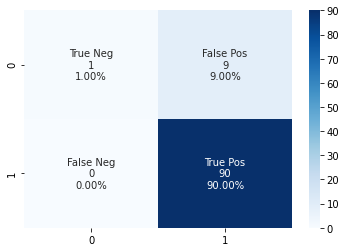

In [18]:
summary["unbalanced_terrible_1_manyones"] = print_result(unbalanced_labels, terrible_predictions_1)

Acc: 0.60, P: 1.00, R: 0.56, F1: 0.71, MCC: 0.33, CK: 0.20


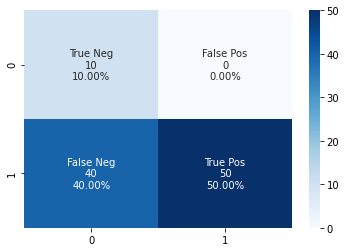

In [19]:
summary["unbalanced_terrible_2_manyones"] = print_result(unbalanced_labels, terrible_predictions_2)

# Summary

In [20]:
df_summary = pd.DataFrame(summary).T
df_summary.columns = "acc, prec, rec, f1, mcc, ck".split(", ")
df_summary

,acc,prec,rec,f1,mcc,ck
balanced_good,0.80,0.800000,0.800000,0.800000,0.600000,0.600000
balanced_bad,0.50,0.500000,0.800000,0.615385,0.000000,0.000000
balanced_terrible,0.00,0.000000,0.000000,0.000000,-1.000000,-1.000000
unbalanced_good_fewones,0.97,1.000000,0.700000,0.823529,0.823055,0.807692
unbalanced_bad_1_fewones,0.90,0.500000,1.000000,0.666667,0.666667,0.615385
unbalanced_bad_2_fewones,0.93,1.000000,0.300000,0.461538,0.527589,0.435484
unbalanced_terrible_1_fewones,0.91,1.000000,0.100000,0.181818,0.301511,0.166667
unbalanced_terrible_2_fewones,0.60,0.200000,1.000000,0.333333,0.333333,0.200000
unbalanced_good_manyones,0.97,0.967742,1.000000,0.983607,0.823055,0.807692
unbalanced_bad_1_manyones,0.90,1.000000,0.888889,0.941176,0.666667,0.615385
